# TensorFlow 2.0

## 課題
    1. データの数を100,000にしてみましょう
    2. 学習率を変えてみましょう. 
    3. 損失関数をHuber lossに変えてみましょう 
    huber lossを適用するための文法は'huber_loss'です。
    
## 解答

今回はそれぞれの値を変更するだけですので、解答を記載したコードは作成しません。

## ライブラリのインポート

In [1]:
# We must always import the relevant libraries for our problem at hand. NumPy and TensorFlow are required for this example.
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2024-02-06 20:36:28.573927: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## データの作成

In [2]:
# データの数を宣言します
observations = 1000

# uniformメソッドを使ってランダムなデータを作成します
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# column_stackを使って二つのベクトルを行列にします
generated_inputs = np.column_stack((xs,zs))

# ノイズを足します
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to our f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
generated_targets = 2*xs - 3*zs + 5 + noise

# save into an npz file called "TF_intro"
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## TensorFlowを用いたコードの作成

In [3]:
# NPZ形式のファイルの読み込み
training_data = np.load('TF_intro.npz')

In [4]:
# 入力のサイズの定義
input_size = 2
# 出力のサイズの定義
output_size = 1

# モデルの作成
model = tf.keras.Sequential([
                            # 'Dense'メソッドで線形結合を行っていきます
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

# 今回はcustom optimizerを使って学習率を0.2に設定します
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# 'compile'で最適化アルゴリズムと損失関数を指定していきます
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# データをモデルにフィットさせていきます
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 37.3970 - 307ms/epoch - 10ms/step
Epoch 2/100
32/32 - 0s - loss: 1.0881 - 31ms/epoch - 955us/step
Epoch 3/100
32/32 - 0s - loss: 0.4659 - 28ms/epoch - 878us/step
Epoch 4/100
32/32 - 0s - loss: 0.3713 - 28ms/epoch - 886us/step
Epoch 5/100
32/32 - 0s - loss: 0.3695 - 26ms/epoch - 810us/step
Epoch 6/100
32/32 - 0s - loss: 0.3619 - 27ms/epoch - 845us/step
Epoch 7/100
32/32 - 0s - loss: 0.3514 - 24ms/epoch - 743us/step
Epoch 8/100
32/32 - 0s - loss: 0.4061 - 27ms/epoch - 839us/step
Epoch 9/100
32/32 - 0s - loss: 0.3906 - 28ms/epoch - 874us/step
Epoch 10/100
32/32 - 0s - loss: 0.3731 - 25ms/epoch - 796us/step
Epoch 11/100
32/32 - 0s - loss: 0.3675 - 25ms/epoch - 777us/step
Epoch 12/100
32/32 - 0s - loss: 0.3672 - 23ms/epoch - 731us/step
Epoch 13/100
32/32 - 0s - loss: 0.3617 - 24ms/epoch - 752us/step
Epoch 14/100
32/32 - 0s - loss: 0.3841 - 26ms/epoch - 799us/step
Epoch 15/100
32/32 - 0s - loss: 0.3639 - 26ms/epoch - 799us/step
Epoch 16/100
32/32 - 0s - loss: 0

## 重みとバイアスの抽出


In [5]:
# 重みとバイアスを表示します
model.layers[0].get_weights()

[array([[ 2.0571022],
        [-2.9648728]], dtype=float32),
 array([5.003693], dtype=float32)]

In [6]:
# 変数に入れます
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0571022],
       [-2.9648728]], dtype=float32)

In [7]:
# 変数に入れます
bias = model.layers[0].get_weights()[1]
bias

array([5.003693], dtype=float32)

## 出力の抽出

In [8]:
# 入力データに対する予測の値を表示していきます
model.predict_on_batch(training_data['inputs']).round(1)

array([[-26.1],
       [ 13.3],
       [  9.6],
       [  1.6],
       [ 24.7],
       [ -5.6],
       [ 51.5],
       [ 17.7],
       [-12.6],
       [ 14.2],
       [  6.9],
       [  2.7],
       [  8.3],
       [ 44.8],
       [-12.9],
       [-10.4],
       [ 18.3],
       [  3.3],
       [ 29.8],
       [ -9.9],
       [  4. ],
       [ 11.5],
       [ -7.3],
       [ -1.5],
       [-26.2],
       [ 31.9],
       [ 18.3],
       [ 21.5],
       [-17.3],
       [ 41.9],
       [ 21.9],
       [ 15.8],
       [ -6.6],
       [-10.7],
       [ 12.4],
       [ 42.2],
       [-16.2],
       [ -8.1],
       [ 11.4],
       [-19.2],
       [ -3.7],
       [ -3.3],
       [ 11.7],
       [ -4.9],
       [-16.9],
       [ 18.7],
       [-36.1],
       [ 41.9],
       [  0.5],
       [ 34.6],
       [ 18.9],
       [ 30. ],
       [ 19.4],
       [-18.6],
       [  0.3],
       [ -1.4],
       [ 10.3],
       [ 27.1],
       [  8.4],
       [-25.3],
       [  8.8],
       [ 18.5],
       [

In [9]:
# ターゲットを表示します
training_data['targets'].round(1)

array([[-26.7],
       [ 11.7],
       [ 10.3],
       [  2.3],
       [ 25.2],
       [ -4. ],
       [ 52. ],
       [ 17.3],
       [-12.7],
       [ 13.1],
       [  5.8],
       [  4.2],
       [  8.7],
       [ 44.9],
       [-13.7],
       [-10.8],
       [ 18.7],
       [  1.9],
       [ 29.3],
       [-10.8],
       [  3.1],
       [ 12.5],
       [ -7.3],
       [ -1.1],
       [-26.1],
       [ 31. ],
       [ 18.3],
       [ 22.3],
       [-17.9],
       [ 41.6],
       [ 22.9],
       [ 16.7],
       [ -7.9],
       [-10.9],
       [ 11.9],
       [ 40.9],
       [-15.6],
       [ -7.5],
       [ 12.1],
       [-18.4],
       [ -4.8],
       [ -4.1],
       [ 10.8],
       [ -5.6],
       [-17.3],
       [ 18.5],
       [-36.5],
       [ 41.5],
       [  0.1],
       [ 34.1],
       [ 19.8],
       [ 30.4],
       [ 19.9],
       [-18.2],
       [ -0.8],
       [ -1.9],
       [ 10.2],
       [ 26.4],
       [  8.7],
       [-24.9],
       [  9.1],
       [ 17.1],
       [

## 散布図の作成

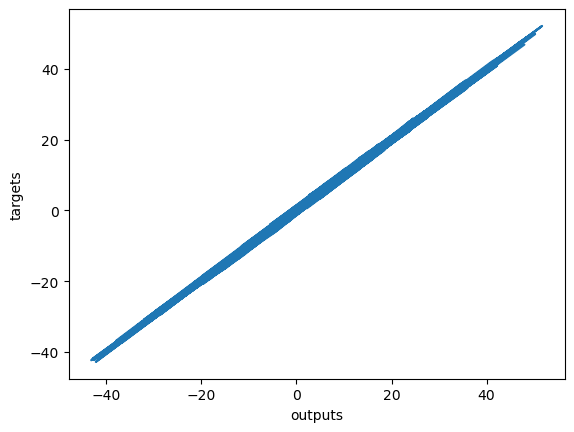

In [10]:
# 散布図を表示していきます
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()
